# Problem a

[584, 591, 590, 578, 594, 598, 597, 600]


Text(0.5,1,'size of the data sets corresponding to different classes')

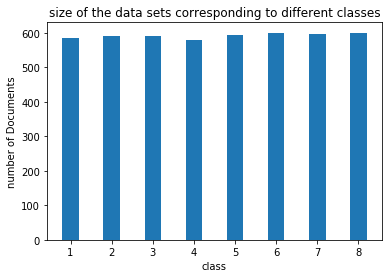

In [14]:
# plot a histogram of the number of training documents per class #
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

categories=[['comp.graphics'],['comp.os.ms-windows.misc'],['comp.sys.ibm.pc.hardware'],['comp.sys.mac.hardware'],
            ['rec.autos'],['rec.motorcycles'],['rec.sport.baseball'],['rec.sport.hockey']]
categories_plot=[]
for i in range(len(categories)):
    newsgroups_train = fetch_20newsgroups(subset='train', categories=categories[i], shuffle=True, random_state=42)
    #print(list(newsgroups_train.target_names))  
    categories_plot.append(newsgroups_train.target.shape[0])
    
print(categories_plot)
X=np.arange(len(categories))+1
Y=categories_plot
fig = plt.figure()
plt.bar(X,Y,0.4)
plt.xlabel("class")
plt.ylabel("number of Documents")
plt.title("size of the data sets corresponding to different classes")


# Problem b

In [6]:
# create a TFxIDF vector representation #

def data_orig(subset,categories):
# fetch origin train or test data#
    data = fetch_20newsgroups(subset=subset, categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    
    return data

categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.ibm.pc.hardware',
              'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
twenty_train = data_orig('train',categories)
twenty_test = data_orig('test',categories)
print(len(twenty_train.data),len(twenty_test.data))

4154 2765


preprocess data

In [7]:
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from string import punctuation
import nltk
stemmer = nltk.stem.SnowballStemmer('english')

combined_stopwords = set.union(set(stop_words_skt),set(punctuation))

from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()
def preprocessr(doc):
    doc=re.sub(r'[^A-Za-z]', " ", doc)
    return (stemmer.stem(w) for w in analyzer(doc) if w not in combined_stopwords)

TFIDF generator

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import re

min_dfs = [2,5]
for min_df in min_dfs:
    count_vect = CountVectorizer(min_df=min_df,analyzer=preprocessr,stop_words=combined_stopwords,
                                 token_pattern='[a-zA-Z]{2,}')
    X_train_counts = count_vect.fit_transform(twenty_train.data)
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    print(X_train_tfidf.shape)

(4154, 12385)
(4154, 5545)


# Problem c

In [70]:
# Find the 10 most significant terms #

alldata = fetch_20newsgroups(subset='all', shuffle=True, random_state=42,remove=('headers','footers','quotes'))

print(len(alldata.data))
print(len(alldata.target_names))    
print(alldata.target_names)

18846
20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


TFICF generator

In [71]:
count_vect = CountVectorizer(min_df=2,analyzer=preprocessr,stop_words=combined_stopwords)
X_counts = count_vect.fit_transform(alldata.data)
doc_count,term_count = X_counts.shape

tf_matrix = np.zeros(shape=(20,term_count))

count =0 
while count < doc_count:
    class_category = alldata.target[count]
    tf_matrix[class_category] = tf_matrix[class_category,] + X_counts[count,]
    count+=1

tf_transformer = TfidfTransformer()
tf_icf = tf_transformer.fit_transform(tf_matrix)

print(tf_icf.shape)

(20, 32471)


Ten most significant terms

In [12]:
features = count_vect.get_feature_names()

def sort_matrix(row, features):
    row = row[0]
    yx = zip(row, features)
    yx_sorted = sorted(yx, key=lambda yx: yx[0],reverse = True)
    print (yx_sorted[0 : 10])
    return

my_list=['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']
count=[3,4,6,15]
for i in range(0,4):
    print ('Ten most significant terms for ',my_list[i], ' are  :- ')
    sort_matrix(tf_icf[count[i]].toarray(), features)

    print('\n')

Ten most significant terms for  comp.sys.ibm.pc.hardware  are  :- 
[(0.39345599839494877, 'scsi'), (0.3029055704515671, 'drive'), (0.24244659570417768, 'use'), (0.19261098577183322, 'ide'), (0.17619623173547225, 'mb'), (0.16519346130473567, 'card'), (0.1381478615560229, 'disk'), (0.1377121091468314, 'control'), (0.1281048259789612, 'dos'), (0.11916239127913579, 'dx')]


Ten most significant terms for  comp.sys.mac.hardware  are  :- 
[(0.2992579580804373, 'mac'), (0.24763455646007948, 'use'), (0.17606857626800396, 'appl'), (0.17484870160563903, 'drive'), (0.17322964109533323, 'scsi'), (0.15858370610744005, 'problem'), (0.15265958552089332, 'mhz'), (0.14346891841993886, 'monitor'), (0.14198497198932428, 'mb'), (0.13835541663725628, 'quadra')]


Ten most significant terms for  misc.forsale  are  :- 
[(0.2099175889401494, 'wolverin'), (0.19914008753634685, 'new'), (0.18801585361493173, 'sale'), (0.16846992221079235, 'offer'), (0.16285425813709925, 'use'), (0.15899643772164154, 'dos'), (0.1

# Problem d

In [54]:
# reduce dimensionality by LSI and NMF #

from sklearn.decomposition import TruncatedSVD
model_svd = TruncatedSVD(n_components=50, algorithm='arpack')
train_LSI = model_svd.fit_transform(X_train_tfidf) # LSI
print (train_LSI.shape)

from sklearn.decomposition import NMF
model_nmf = NMF(n_components=50, init='nndsvd', random_state=42)
train_NMF=model_nmf.fit_transform(X_train_tfidf) #NMF
print(train_NMF.shape)

(4154, 50)
(4154, 50)


# Problem e

In [58]:
# hard margin SVC #
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.ibm.pc.hardware',
              'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
def data_proc(subset,data_train,data_test):
# process data with TFxIDF & LSI model#

    twenty_train = fetch_20newsgroups(subset=subset, categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    count_vect = CountVectorizer(min_df=min_df,analyzer=preprocessr,stop_words=combined_stopwords,token_pattern='[a-zA-Z]{2,}')
    X_train_counts = count_vect.fit_transform(twenty_train.data)
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    model_svd = TruncatedSVD(n_components=50, algorithm='arpack')
    train_LSI = model_svd.fit_transform(X_train_tfidf)
    return train_LSI

def data_proc_NMF(subset,categories): 
    twenty_train = fetch_20newsgroups(subset=subset, categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    count_vect = CountVectorizer(min_df=2,analyzer=preprocessr,stop_words=combined_stopwords,token_pattern='[a-zA-Z]{2,}')
    X_train_counts = count_vect.fit_transform(twenty_train.data)
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    model_nmf = NMF(n_components=50, init='nndsvd', random_state=42)
    train_NMF = model_nmf.fit_transform(X_train_tfidf)
    return train_NMF

# construct training set#
train_LSI = data_proc('train',categories)
train_data = data_orig('train',categories)
train_target_group = [ int(x / 4) for x in train_data.target]
print(len(train_target_group))
print(train_target_group[1:10])

4154
[1, 1, 1, 1, 0, 0, 1, 1, 0]


In [59]:
# build SVM classifier#
from sklearn import svm
svc = svm.LinearSVC(C=1000)
svc.fit(train_LSI, train_target_group)
# construct testing set#
test_LSI = data_proc('test',categories)
test_data = data_orig('test',categories)
test_target_group = [ int(x / 4) for x in test_data.target]

svm_predicted = svc.predict(test_LSI)
print (test_target_group[0:40]-svm_predicted[0:40])
y_score = svc.fit(train_LSI, train_target_group).decision_function(test_LSI)
print (y_score[0:20])
print (y_score.shape, svm_predicted.shape)

[ 0  0  0  0  0  1  0  0  0  0  0  0  0 -1  1  0  0  0 -1  0 -1  0  0 -1
  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0]
[ 2.42 -1.39  2.17 -2.32 -5.81  0.8   3.36 -4.41 -1.75  2.69  1.12  3.22
  9.76  1.53  1.06  4.62  1.6   3.54  3.57  6.37]
(2765,) (2765,)


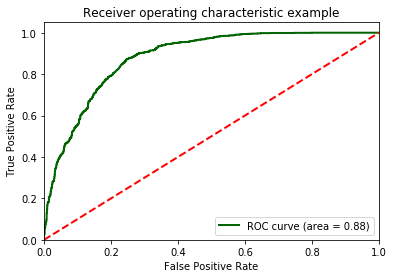

In [60]:
# plot ROC curve#
y_score_test = svc.decision_function(test_LSI)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# calculate ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test)

def plot_roc(fpr, tpr):   
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkgreen',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

plot_roc(fpr, tpr)

Confusion matrix, without normalization
[[ 744  431]
 [  88 1502]]
Normalized confusion matrix
[[0.63 0.37]
 [0.06 0.94]]


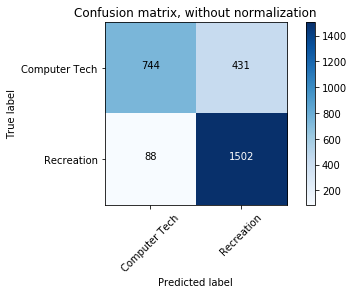

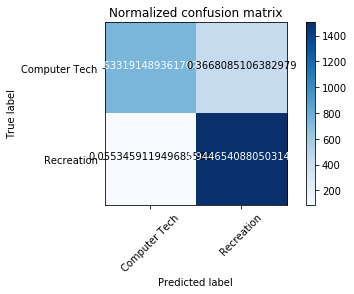

In [61]:
# Confusion matrix #
svm_predicted = svc.predict(test_LSI)
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, svm_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [62]:
# calculate the accuracy, recall and precision of the classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def scores(test_target_group, predicted):
    # definition about accuracy, recall and precision #
    accuracy = accuracy_score(test_target_group, predicted)
    recall = recall_score(test_target_group, predicted)
    precision = precision_score(test_target_group, predicted)
    print ('The accuracy score is:', accuracy)
    print ('The recall score is:', recall)
    print ('The precision score is:', precision)

scores(test_target_group, svm_predicted)

The accuracy score is: 0.8122965641952984
The recall score is: 0.9446540880503145
The precision score is: 0.7770305225038799


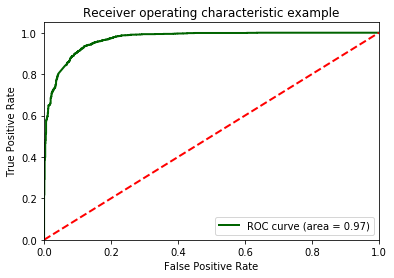

Confusion matrix, without normalization
[[  44 1131]
 [   0 1590]]
Normalized confusion matrix
[[0.04 0.96]
 [0.   1.  ]]


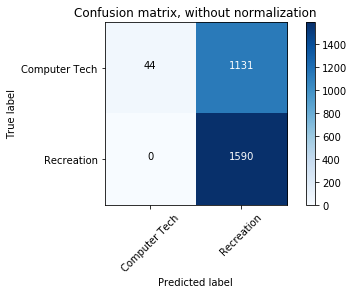

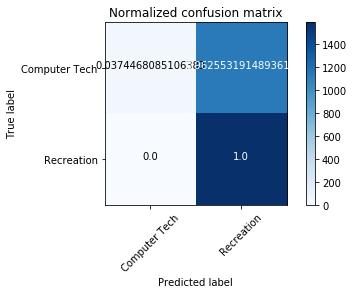

The accuracy score is: 0.5909584086799277
The recall score is: 1.0
The precision score is: 0.5843439911797134


In [41]:
# soft margin SVC #

# build SVM classifier#
from sklearn import svm
svc = svm.LinearSVC(C=0.001)
svc.fit(train_LSI, train_target_group)
svm_predicted = svc.predict(test_LSI)
y_score = svc.fit(train_LSI, train_target_group).decision_function(test_LSI)

# Compute ROC curve and ROC area for each class
y_score_test = svc.decision_function(test_LSI)
fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test)
plot_roc(fpr, tpr)

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, svm_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# calculate the accuracy, recall and precision of the classifier
scores(test_target_group, svm_predicted)

# Part f

In [42]:
# 5-fold #

from sklearn.cross_validation import KFold
kf = KFold(len(train_target_group), n_folds=5,shuffle=True,random_state=42)

from sklearn import svm
matrix = [[0]*7 for i in range(5)]
i = 0
j = 0

for train_index, test_index in kf:
    X_train, X_test = train_LSI[train_index], train_LSI[test_index]
    for k in [-3, -2, -1, 0, 1, 2, 3]:
        X_train_target_group = [ int(x / 4) for x in twenty_train.target[train_index]]
        X_test_target_group = [ int(x / 4) for x in twenty_train.target[test_index]]
        
        soft_svm_clf = svm.LinearSVC(C=10**k)
        soft_svm_clf.fit(X_train, X_train_target_group)
        score = soft_svm_clf.score(X_test, X_test_target_group)
        matrix[i][j]=score
        j=j+1
    i=i+1
    j=0
    
import numpy as np
np.mean(matrix, axis=0, dtype=np.float64)

array([0.58, 0.86, 0.93, 0.94, 0.95, 0.95, 0.94])

In [43]:
from sklearn import svm
soft_svc = svm.LinearSVC(C=10**1)
soft_svc.fit(train_LSI, train_target_group)
soft_svc_predicted = soft_svc.predict(test_LSI)
score = soft_svc.score(test_LSI, test_target_group)
print (score)

0.8524412296564196


Confusion matrix, without normalization
[[ 910  265]
 [ 143 1447]]
Normalized confusion matrix
[[0.77 0.23]
 [0.09 0.91]]


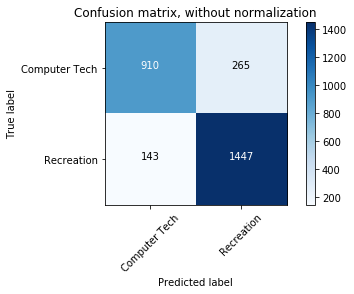

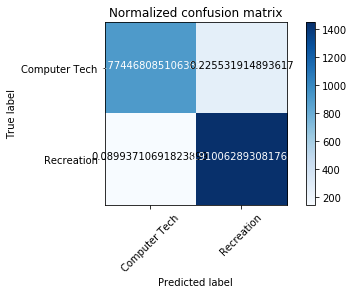

The accuracy score is: 0.5909584086799277
The recall score is: 1.0
The precision score is: 0.5843439911797134


In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, soft_svc_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# calculate the accuracy, recall and precision of the classifier
scores(test_target_group, svm_predicted)

# Part g

In [96]:
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.ibm.pc.hardware',
              'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
train_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))

# X_train_tfidf
count_vect = CountVectorizer(min_df=2,analyzer=preprocessr,stop_words=combined_stopwords,token_pattern='[a-zA-Z]{2,}')
X_train_counts = count_vect.fit_transform(train_data.data)
X_train_tfidf = TfidfTransformer().fit_transform(X_train_counts)

# X_test_tfidf
count_vect = CountVectorizer(min_df=2,analyzer=preprocessr,stop_words=combined_stopwords,token_pattern='[a-zA-Z]{2,}')
X_test_counts = count_vect.fit_transform(test_data.data)
X_test_tfidf = TfidfTransformer().fit_transform(X_test_counts)

# LSI model
model_svd = TruncatedSVD(n_components=50, algorithm='arpack')
train_LSI = model_svd.fit_transform(X_train_tfidf)
test_LSI = model_svd.fit_transform(X_test_tfidf)

# NMF model
model_nmf = NMF(n_components=50, init='nndsvd', random_state=42)
train_NMF = model_nmf.fit_transform(X_train_tfidf)
test_NMF = model_nmf.fit_transform(X_test_tfidf)

# target
train_target_group = [ int(x / 4) for x in train_data.target]
test_target_group = [ int(x / 4) for x in test_data.target]

Multinomial naive bayes

In [81]:
from sklearn.naive_bayes import MultinomialNB
mnb_clf = MultinomialNB()
mnb_clf.fit(train_NMF, train_target_group)
predicted = mnb_clf.predict(test_NMF)

print(predicted.shape)
print(predicted[0:20])

(2765,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


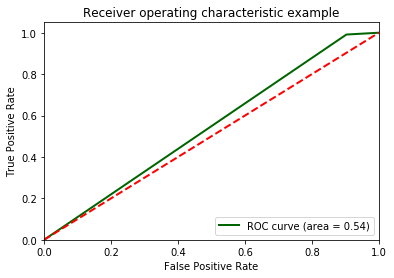

Confusion matrix, without normalization
[[ 114 1061]
 [  14 1576]]
Normalized confusion matrix
[[0.1  0.9 ]
 [0.01 0.99]]
The accuracy score is: 0.6112115732368897
The recall score is: 0.9911949685534591
The precision score is: 0.5976488433826318


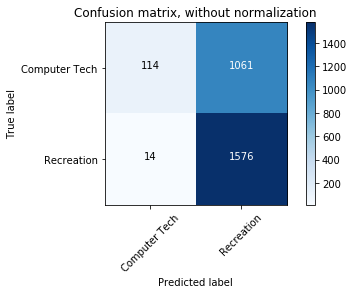

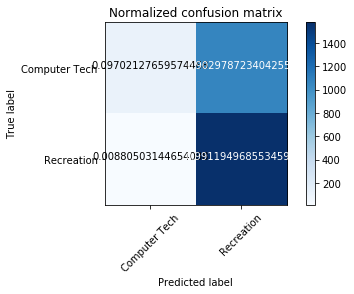

In [82]:
y_score_test_nb = clf.predict(test_NMF)
fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_nb)
plot_roc(fpr, tpr)

class_names = ['Computer Tech', 'Recreation']
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, soft_svc_predicted)
np.set_printoptions(precision=2)

nb_predicted = clf.predict(test_NMF)
cnf_matrix = confusion_matrix(test_target_group, nb_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

scores(test_target_group, nb_predicted)

Gaussian nauve bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_NMF, train_target_group)
predicted = clf.predict(test_NMF)
print(predicted.shape)
print(predicted[0:10])

(2765,)
[0 0 1 0 0 1 1 0 0 0]


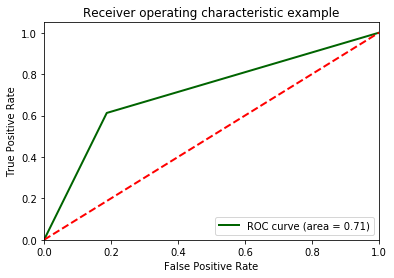

Confusion matrix, without normalization
[[955 220]
 [616 974]]
Normalized confusion matrix
[[0.81 0.19]
 [0.39 0.61]]
The accuracy score is: 0.6976491862567812
The recall score is: 0.6125786163522012
The precision score is: 0.8157453936348409


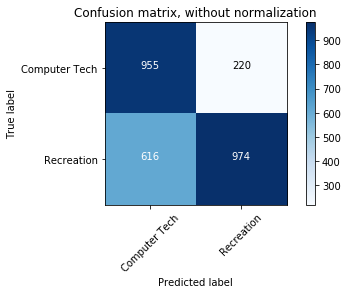

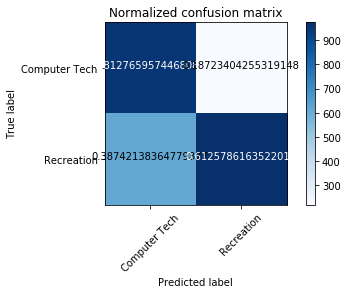

In [98]:
# Compute ROC curve and ROC area for each class
y_score_test_nb = clf.predict(test_NMF)
fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_nb)
plot_roc(fpr, tpr)

class_names = ['Computer Tech', 'Recreation']
# Compute confusion matrix
nb_predicted = clf.predict(test_NMF)
cnf_matrix = confusion_matrix(test_target_group, nb_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

scores(test_target_group, nb_predicted)

# Problem h

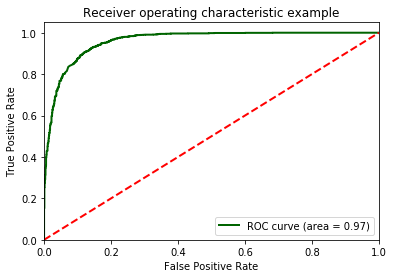

Confusion matrix, without normalization
[[ 925  250]
 [  46 1544]]
Normalized confusion matrix
[[0.79 0.21]
 [0.03 0.97]]


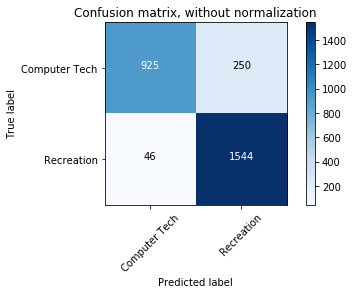

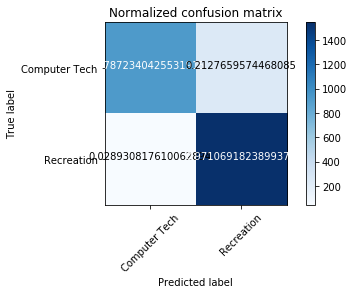

The accuracy score is: 0.8929475587703436
The recall score is: 0.9710691823899371
The precision score is: 0.8606465997770345


In [106]:
# logistic regression classifier#
from sklearn import linear_model, datasets
lr_norm2 = linear_model.LogisticRegression()
lr_norm2.fit(train_LSI, train_target_group)

y_score_test_lr_norm2 = lr_norm2.decision_function(test_LSI)

# Compute ROC curve and ROC area for each class

fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_lr_norm2)
plot_roc(fpr, tpr)


# Compute confusion matrix
lr_norm2_predicted = lr_norm2.predict(test_LSI)
cnf_matrix = confusion_matrix(test_target_group, lr_norm2_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# calculate the accuracy, recall and precision of the classifier
scores(test_target_group, lr_norm2_predicted)

In [107]:
from sklearn.metrics import confusion_matrix

coef = [0.01, 0.1, 1, 10, 100, 1000, 10000]
for c in coef:
    lr_norm2 = linear_model.LogisticRegression(C = c)
    lr_norm2.fit(train_LSI, train_target_group)
    lr_norm2_predicted = lr_norm2.predict(test_LSI)
    y_score_test_lr_norm2 = lr_norm2.decision_function(test_LSI)
    print ("coef:", c)
    print (y_score_test_lr_norm2)
    print (confusion_matrix(test_target_group, lr_norm2_predicted))

coef: 0.01
[0.31 0.11 0.32 ... 0.33 0.37 0.35]
[[  95 1080]
 [   0 1590]]
coef: 0.1
[ 0.57 -0.65  0.6  ...  0.61  0.82  0.8 ]
[[ 818  357]
 [  11 1579]]
coef: 1
[ 1.26 -2.21  1.18 ...  0.69  1.41  1.98]
[[ 925  250]
 [  46 1544]]
coef: 10
[ 2.32 -4.11  1.99 ...  0.19  1.9   4.24]
[[ 945  230]
 [  96 1494]]
coef: 100
[ 3.65 -6.17  3.27 ... -0.61  2.37  7.81]
[[ 931  244]
 [ 135 1455]]
coef: 1000
[ 4.96 -7.2   4.36 ... -1.62  2.33 10.35]
[[ 891  284]
 [ 159 1431]]
coef: 10000
[ 5.71 -6.95  4.73 ... -2.51  1.83 11.02]
[[ 879  296]
 [ 170 1420]]


# Part i

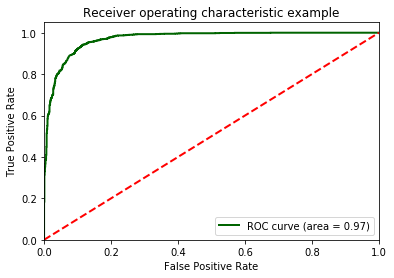

Confusion matrix, without normalization
[[1028  147]
 [  87 1503]]
Normalized confusion matrix
[[0.87 0.13]
 [0.05 0.95]]


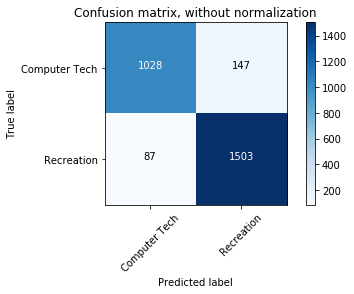

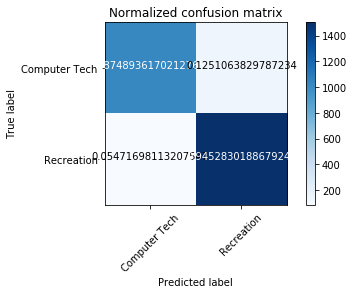

The accuracy score is: 0.915370705244123
The recall score is: 0.9452830188679245
The precision score is: 0.9109090909090909


In [108]:
# logistic regression classifier with norm l1#
from sklearn import linear_model, datasets
lr_norm1 = linear_model.LogisticRegression(penalty='l1')
lr_norm1.fit(train_LSI, train_target_group)

y_score_test_lr_norm1 = lr_norm1.decision_function(test_LSI)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_lr_norm1)
plot_roc(fpr, tpr)

# Compute confusion matrix
lr_norm1_predicted = lr_norm1.predict(test_LSI)
cnf_matrix = confusion_matrix(test_target_group, lr_norm1_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# calculate the accuracy, recall and precision of the classifier
scores(test_target_group, lr_norm1_predicted)

In [109]:
from sklearn.metrics import confusion_matrix

coef = [0.01, 0.1, 1, 10, 100, 1000, 10000]
for c in coef:
    lr_norm1 = linear_model.LogisticRegression(C = c)
    lr_norm1.fit(train_LSI, train_target_group)
    lr_norm1_predicted = lr_norm1.predict(test_LSI)
    y_score_test_lr_norm2 = lr_norm2.decision_function(test_LSI)
    print ("coef:", c)
    print (y_score_test_lr_norm1)
    print (confusion_matrix(test_target_group, lr_norm2_predicted))

coef: 0.01
[ 1.7  -7.96  2.2  ...  1.11  3.09  4.86]
[[ 879  296]
 [ 170 1420]]
coef: 0.1
[ 1.7  -7.96  2.2  ...  1.11  3.09  4.86]
[[ 879  296]
 [ 170 1420]]
coef: 1
[ 1.7  -7.96  2.2  ...  1.11  3.09  4.86]
[[ 879  296]
 [ 170 1420]]
coef: 10
[ 1.7  -7.96  2.2  ...  1.11  3.09  4.86]
[[ 879  296]
 [ 170 1420]]
coef: 100
[ 1.7  -7.96  2.2  ...  1.11  3.09  4.86]
[[ 879  296]
 [ 170 1420]]
coef: 1000
[ 1.7  -7.96  2.2  ...  1.11  3.09  4.86]
[[ 879  296]
 [ 170 1420]]
coef: 10000
[ 1.7  -7.96  2.2  ...  1.11  3.09  4.86]
[[ 879  296]
 [ 170 1420]]


# Part i Multiclass Classification

Multiclass Gaussian Naive Bayes-LSI

(1565,)
Confusion matrix, without normalization
[[138  91 131  32]
 [132 106 109  38]
 [131  41 176  42]
 [131  76  68 123]]
Normalized confusion matrix
[[0.35 0.23 0.33 0.08]
 [0.34 0.28 0.28 0.1 ]
 [0.34 0.11 0.45 0.11]
 [0.33 0.19 0.17 0.31]]


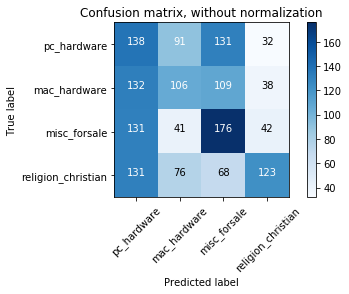

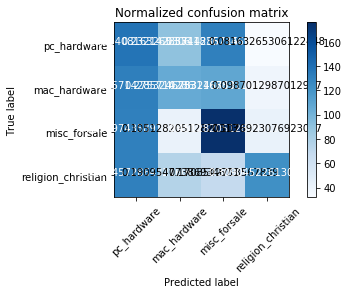

The accuracy is 0.3469648562300319
The recall is 0.3469648562300319
The precision is 0.371747884234991


In [91]:
categories_i = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']

train_LSI_i = data_proc('train',categories_i)
test_LSI_i  = data_proc('test',categories_i)
train_set_i = data_orig('train',categories_i)
test_set_i  = data_orig('test',categories_i)

from sklearn.naive_bayes import GaussianNB
nb_clf_i = GaussianNB().fit(train_LSI_i, train_set_i.target)
nb_predicted_i = nb_clf_i.predict(test_LSI_i)
print (nb_predicted_i.shape)

from sklearn.metrics import confusion_matrix
import itertools
class_names = ['pc_hardware', 'mac_hardware', 'misc_forsale', 'religion_christian']

# Compute confusion matrix
cnf_matrix_i = confusion_matrix(test_set_i.target, nb_predicted_i)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_i, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_i, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# calculate the accuracy, recall and precision of the classifier
nb_accuracy = accuracy_score(test_set_i.target, nb_predicted_i)
print ('The accuracy is', nb_accuracy)

nb_recall_score = recall_score(test_set_i.target, nb_predicted_i,average='weighted')
print ('The recall is',nb_recall_score)

nb_precision_score = precision_score(test_set_i.target, nb_predicted_i,average='weighted')
print ('The precision is',nb_precision_score)

Multiclass Gaussian Naive Bayes-NMF

In [ ]:
categories_i = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']

train_NMF_i = data_proc_NMF('train',categories_i)
test_NMF_i  = data_proc_NMF('test',categories_i)
train_set_i = data_orig('train',categories_i)
test_set_i  = data_orig('test',categories_i)

from sklearn.naive_bayes import GaussianNB
nb_clf_i = GaussianNB().fit(train_NMF_i, train_set_i.target)
nb_predicted_i = nb_clf_i.predict(test_NMF_i)
print (nb_predicted_i.shape)

from sklearn.metrics import confusion_matrix
import itertools
class_names = ['pc_hardware', 'mac_hardware', 'misc_forsale', 'religion_christian']

# Compute confusion matrix
cnf_matrix_i = confusion_matrix(test_set_i.target, nb_predicted_i)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_i, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_i, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# calculate the accuracy, recall and precision of the classifier
nb_accuracy = accuracy_score(test_set_i.target, nb_predicted_i)
print ('The accuracy is', nb_accuracy)

nb_recall_score = recall_score(test_set_i.target, nb_predicted_i,average='weighted')
print ('The recall is',nb_recall_score)

nb_precision_score = precision_score(test_set_i.target, nb_predicted_i,average='weighted')
print ('The precision is',nb_precision_score)

SVM

In [113]:
# SVM OVO #

In [115]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

ovo_svc = OneVsOneClassifier(LinearSVC(C=100, random_state=42)).fit(train_LSI_i, train_set_i.target)
ovo_predicted = ovo_svc.predict(test_LSI_i)
print (ovo_predicted)

[2 1 1 ... 1 2 3]


Confusion matrix, without normalization
[[210 121  48  13]
 [ 79 241  54  11]
 [ 42  43 293  12]
 [  1  19  13 365]]
Normalized confusion matrix
[[0.54 0.31 0.12 0.03]
 [0.21 0.63 0.14 0.03]
 [0.11 0.11 0.75 0.03]
 [0.   0.05 0.03 0.92]]


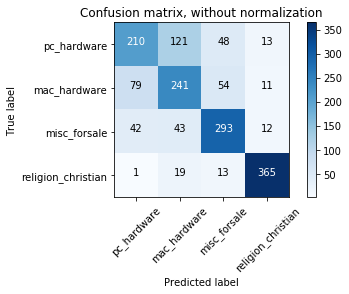

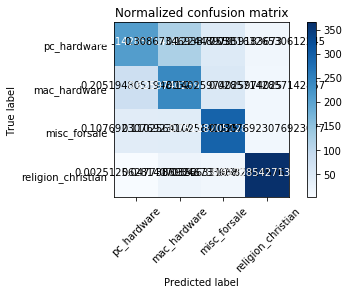

The accuracy is  0.708626198083067
The recall is  0.708626198083067
The precision is  0.7087074827436317


In [116]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_set_i.target, ovo_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# accuracy, recall, precision #
from sklearn.metrics import accuracy_score
ovo_predicted_predicted_accuracy = accuracy_score(test_set_i.target, ovo_predicted)
print ('The accuracy is ',ovo_predicted_predicted_accuracy)
from sklearn.metrics import recall_score
ovo_predicted_recall_score = recall_score(test_set_i.target, ovo_predicted,average='weighted')
print ('The recall is ',ovo_predicted_recall_score)

from sklearn.metrics import precision_score
ovo_predicted_precision_score = precision_score(test_set_i.target, ovo_predicted,average='weighted')
print ('The precision is ',ovo_predicted_precision_score)

In [117]:
# SVM OVR #
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

ovr_svc = OneVsRestClassifier(LinearSVC(C=1000, random_state=42)).fit(train_LSI_i, train_set_i.target)
ovr_predicted = ovr_svc.predict(test_LSI_i)
print (ovr_predicted)

[2 1 1 ... 1 2 3]


Confusion matrix, without normalization
[[201 119  40  32]
 [ 74 260  37  14]
 [ 45  41 290  14]
 [  2  21   9 366]]
Normalized confusion matrix
[[0.51 0.3  0.1  0.08]
 [0.19 0.68 0.1  0.04]
 [0.12 0.11 0.74 0.04]
 [0.01 0.05 0.02 0.92]]


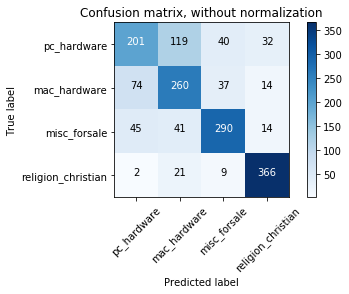

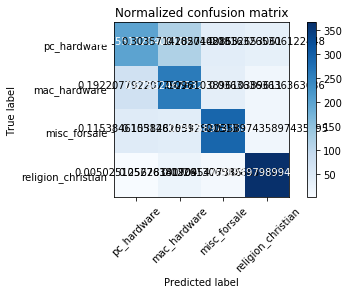

The accuracy is  0.7137380191693291
The recall is  0.7137380191693291
The precision is  0.7120902961471544


In [118]:
# plot ROC curve #
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_set_i.target, ovr_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# accuracy, recall, precision #
from sklearn.metrics import accuracy_score
ovr_predicted_predicted_accuracy = accuracy_score(test_set_i.target, ovr_predicted)
print ('The accuracy is ',ovr_predicted_predicted_accuracy)
from sklearn.metrics import recall_score
ovr_predicted_recall_score = recall_score(test_set_i.target, ovr_predicted,average='weighted')
print ('The recall is ',ovr_predicted_recall_score)

from sklearn.metrics import precision_score
ovr_predicted_precision_score = precision_score(test_set_i.target, ovr_predicted,average='weighted')
print ('The precision is ',ovr_predicted_precision_score)